# NYSED School Report Card Project

### Variable descriptions (from the original data curated by NYSED):

- ```INSTITUTION_ID```: 12-digit unique school identifier which remains consistent over time.

- ```ENTITY_CD```: Also a 12-digit school identifier, but the code will update with changes in location, district, or any other subgroup assignments. Using the ```ENTITY_CD``` variable, along with the associated documentation, we can filter schools by location (county/city/town), school district, and type of school.

- ```ENTITY_NAME```: The name of the school.

- ```WEIGHTED_INDEX```: Weighted Average Performance Index for the Subgroup by Subject.

- ```ENROLLMENT```: Number of students in grades 9-12 (and ungraded age equivalent) enrolled for 10 or more instructional days and present for at least one of those days.

- ```ABSENT_COUNT```: Number of students in grades 9-12 (and ungraded age equivalent) enrolled for 10 or more instructional days, present for at least one of those days, and absent for 10% or more of enrolled days.

- ```GRAD_COUNT```: Number of students in the ```COHORT_COUNT``` who graduated as of August 31st of the year prior to the reporting year. Not reported for “Combined” cohort.

- ```COHORT_COUNT```: Number of students in the cohort as of June 30th of the year prior to the reporting year. Not reported for “Combined” cohort.

- ```ELA_P_RATE```: Percent of students in grade 12 in the current year with a valid score on an approved ELA assessment.

- ```MATH_P_RATE```: Percent of students in grade 12 in the current year with a valid score on an approved Math assessment.

- ```PUPIL_COUNT_TOT```: Pupil counts for districts, schools, and statewide.

- ```FED_STATE_LOCAL_EXP```: Total federal and state/local expenditures.

- ```NUM_TEACH```: Number of teachers as reported in the Student Information Repository System (SIRS).

- ```NUM_TEACH_INEXP```: Number of teachers with fewer than four years of experience in their positions.

- ```NUM_TEACH_OC```: Number of teachers as reported in the Student Information Repository System (SIRS).

- ```NUM_OUT_CERT```: Number of teachers teaching out of their subject/field of certification.

More information about the ```ENTITY_CD``` variable can be found in the PDF README file attached to this repo.

### Variables created in Python:

I also created new variables, which are variables in the original README file but are re-created in Python to avoid any rounding problems while migrating data from SQL to Python.

- ```ABSENT_RATE```: Chronic absenteeism rate for current reporting year (```= ABSENT_COUNT / ENROLLMENT * 100```)

- ```GRAD_RATE```: Graduation rate of the 4-year graduation rate total cohort (```= GRAD_COUNT / COHORT_COUNT * 100```)

- ```PER_FED_STATE_LOCAL_EXP```: Per pupil expenditures using federal and state/local funds (```= FED_STATE_LOCAL_EXP / PUPIL_COUNT_TOT```)

- ```PER_TEACH_INEXP```: Percent of teachers with fewer than four years of experience in their positions (```= NUM_TEACH_INEXP / NUM_TEACH * 100```)

- ```PER_OUT_CERT```: Percent of teachers teaching out of their subject/field of certification (```= NUM_OUT_CERT / NUM_TEACH_OC * 100```)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nysed_2024 = pd.read_csv('data/nysed_2024_preprocessing.csv')
nysed_2024.head()

,INSTITUTION_ID,ENTITY_CD,ENTITY_NAME,WEIGHTED_INDEX,ENROLLMENT,ABSENT_COUNT,GRAD_COUNT,COHORT_COUNT,ELA_P_RATE,MATH_P_RATE,PUPIL_COUNT_TOT,FED_STATE_LOCAL_EXP,NUM_TEACH,NUM_TEACH_INEXP,NUM_TEACH_OC,NUM_OUT_CERT
0,800000055743,10100010034,ALBANY HIGH SCHOOL,82.2,3046,1550,549,704,98.9,84.3,2764,94032063,235,63,214,14
1,800000055479,10201040001,BERNE-KNOX-WESTERLO JUNIOR-SENIOR HS,142.3,222,42,47,53,100.0,86.7,326,11481752,41,11,41,1
2,800000055439,10306060008,BETHLEHEM CENTRAL SENIOR HIGH SCHOOL,198.1,1374,155,333,349,99.4,92.1,1373,32156676,110,9,107,1
3,800000055436,10402060001,RAVENA-COEYMANS-SELKIRK SR HS,129.2,530,164,118,133,100.0,87.9,518,13997053,59,24,55,3
4,800000055426,10500010007,COHOES HIGH SCHOOL,94.0,619,326,109,132,100.0,81.0,593,14868772,52,8,51,0


Data preprocessing

In [3]:
nysed_2024['ABSENT_RATE'] = nysed_2024['ABSENT_COUNT'] / nysed_2024['ENROLLMENT']
nysed_2024['GRAD_RATE'] = nysed_2024['GRAD_COUNT'] / nysed_2024['COHORT_COUNT']
nysed_2024['PER_FED_STATE_LOCAL_EXP'] = nysed_2024['FED_STATE_LOCAL_EXP'] / nysed_2024['PUPIL_COUNT_TOT']
nysed_2024['PER_TEACH_INEXP'] = nysed_2024['NUM_TEACH_INEXP'] / nysed_2024['NUM_TEACH']
nysed_2024['PER_OUT_CERT'] = nysed_2024['NUM_OUT_CERT'] / nysed_2024['NUM_TEACH_OC']

In [4]:
nysed_2024.head()

,INSTITUTION_ID,ENTITY_CD,ENTITY_NAME,WEIGHTED_INDEX,ENROLLMENT,ABSENT_COUNT,GRAD_COUNT,COHORT_COUNT,ELA_P_RATE,MATH_P_RATE,...,FED_STATE_LOCAL_EXP,NUM_TEACH,NUM_TEACH_INEXP,NUM_TEACH_OC,NUM_OUT_CERT,ABSENT_RATE,GRAD_RATE,PER_FED_STATE_LOCAL_EXP,PER_TEACH_INEXP,PER_OUT_CERT
0,800000055743,10100010034,ALBANY HIGH SCHOOL,82.2,3046,1550,549,704,98.9,84.3,...,94032063,235,63,214,14,0.508864,0.779830,34020.283285,0.268085,0.065421
1,800000055479,10201040001,BERNE-KNOX-WESTERLO JUNIOR-SENIOR HS,142.3,222,42,47,53,100.0,86.7,...,11481752,41,11,41,1,0.189189,0.886792,35220.098160,0.268293,0.024390
2,800000055439,10306060008,BETHLEHEM CENTRAL SENIOR HIGH SCHOOL,198.1,1374,155,333,349,99.4,92.1,...,32156676,110,9,107,1,0.112809,0.954155,23420.739985,0.081818,0.009346
3,800000055436,10402060001,RAVENA-COEYMANS-SELKIRK SR HS,129.2,530,164,118,133,100.0,87.9,...,13997053,59,24,55,3,0.309434,0.887218,27021.337838,0.406780,0.054545
4,800000055426,10500010007,COHOES HIGH SCHOOL,94.0,619,326,109,132,100.0,81.0,...,14868772,52,8,51,0,0.526656,0.825758,25073.814503,0.153846,0.000000


In [5]:
nysed_2024.shape

(990, 21)

In [6]:
nysed_2024.describe()

,INSTITUTION_ID,ENTITY_CD,WEIGHTED_INDEX,ENROLLMENT,ABSENT_COUNT,GRAD_COUNT,COHORT_COUNT,ELA_P_RATE,MATH_P_RATE,PUPIL_COUNT_TOT,FED_STATE_LOCAL_EXP,NUM_TEACH,NUM_TEACH_INEXP,NUM_TEACH_OC,NUM_OUT_CERT,ABSENT_RATE,GRAD_RATE,PER_FED_STATE_LOCAL_EXP,PER_TEACH_INEXP,PER_OUT_CERT
count,9.900000e+02,9.900000e+02,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,949.000000,990.000000,9.900000e+02,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,8.000001e+11,3.490071e+11,117.198586,755.427273,233.007071,163.050505,182.601010,95.714343,84.129821,796.629293,2.282600e+07,70.062626,12.980808,67.656566,6.235354,0.351075,0.882767,29896.664771,0.202937,0.116564
std,1.222746e+04,1.563176e+11,48.521109,673.587789,230.874468,152.568874,167.142575,11.664413,16.813701,646.010156,1.745835e+07,45.829178,10.892834,44.336123,10.043795,0.205835,0.136408,6408.318318,0.126757,0.159363
min,8.000000e+11,1.010001e+10,1.600000,140.000000,0.000000,7.000000,50.000000,1.000000,6.400000,93.000000,2.250587e+06,13.000000,0.000000,11.000000,0.000000,0.000000,0.140000,11519.781971,0.000000,0.000000
25%,8.000000e+11,2.804023e+11,77.100000,363.000000,105.000000,73.000000,84.000000,96.900000,77.400000,389.000000,1.171352e+07,38.000000,6.000000,37.000000,1.000000,0.205318,0.852273,25820.996796,0.106383,0.016810
50%,8.000001e+11,3.313000e+11,119.400000,485.000000,171.000000,103.000000,114.000000,99.100000,89.900000,564.500000,1.609681e+07,54.000000,10.000000,52.000000,4.000000,0.307280,0.917808,29200.819512,0.176471,0.069570
75%,8.000001e+11,4.218000e+11,153.200000,944.750000,257.500000,210.750000,228.750000,100.000000,95.900000,1023.000000,2.919355e+07,90.000000,17.000000,86.750000,7.000000,0.453353,0.958904,33163.077350,0.275805,0.147059
max,8.000001e+11,6.806011e+11,241.500000,5794.000000,1617.000000,1456.000000,1498.000000,100.000000,100.000000,5810.000000,1.341109e+08,344.000000,79.000000,331.000000,93.000000,1.000000,1.000000,80138.655488,0.782178,0.898734


In [7]:
nysed_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INSTITUTION_ID           990 non-null    int64  
 1   ENTITY_CD                990 non-null    int64  
 2   ENTITY_NAME              990 non-null    object 
 3   WEIGHTED_INDEX           990 non-null    float64
 4   ENROLLMENT               990 non-null    int64  
 5   ABSENT_COUNT             990 non-null    int64  
 6   GRAD_COUNT               990 non-null    int64  
 7   COHORT_COUNT             990 non-null    int64  
 8   ELA_P_RATE               990 non-null    float64
 9   MATH_P_RATE              949 non-null    float64
 10  PUPIL_COUNT_TOT          990 non-null    int64  
 11  FED_STATE_LOCAL_EXP      990 non-null    int64  
 12  NUM_TEACH                990 non-null    int64  
 13  NUM_TEACH_INEXP          990 non-null    int64  
 14  NUM_TEACH_OC             9

In [8]:
nysed_2024.nunique()

INSTITUTION_ID             987
ENTITY_CD                  987
ENTITY_NAME                985
WEIGHTED_INDEX             772
ENROLLMENT                 651
ABSENT_COUNT               413
GRAD_COUNT                 351
COHORT_COUNT               341
ELA_P_RATE                 172
MATH_P_RATE                381
PUPIL_COUNT_TOT            687
FED_STATE_LOCAL_EXP        987
NUM_TEACH                  172
NUM_TEACH_INEXP             62
NUM_TEACH_OC               173
NUM_OUT_CERT                54
ABSENT_RATE                970
GRAD_RATE                  758
PER_FED_STATE_LOCAL_EXP    987
PER_TEACH_INEXP            603
PER_OUT_CERT               445
dtype: int64

In [9]:
nysed_2024.isna().sum()

INSTITUTION_ID              0
ENTITY_CD                   0
ENTITY_NAME                 0
WEIGHTED_INDEX              0
ENROLLMENT                  0
ABSENT_COUNT                0
GRAD_COUNT                  0
COHORT_COUNT                0
ELA_P_RATE                  0
MATH_P_RATE                41
PUPIL_COUNT_TOT             0
FED_STATE_LOCAL_EXP         0
NUM_TEACH                   0
NUM_TEACH_INEXP             0
NUM_TEACH_OC                0
NUM_OUT_CERT                0
ABSENT_RATE                 0
GRAD_RATE                   0
PER_FED_STATE_LOCAL_EXP     0
PER_TEACH_INEXP             0
PER_OUT_CERT                0
dtype: int64

In [10]:
# List of numerical columns (apart from INSTITUTION_ID and ENTITY_CD)
numerical_cols = nysed_2024.describe().columns.drop(['INSTITUTION_ID', 'ENTITY_CD'])
numerical_cols

Index(['WEIGHTED_INDEX', 'ENROLLMENT', 'ABSENT_COUNT', 'GRAD_COUNT',
       'COHORT_COUNT', 'ELA_P_RATE', 'MATH_P_RATE', 'PUPIL_COUNT_TOT',
       'FED_STATE_LOCAL_EXP', 'NUM_TEACH', 'NUM_TEACH_INEXP', 'NUM_TEACH_OC',
       'NUM_OUT_CERT', 'ABSENT_RATE', 'GRAD_RATE', 'PER_FED_STATE_LOCAL_EXP',
       'PER_TEACH_INEXP', 'PER_OUT_CERT'],
      dtype='object')

Text(0.5, 1.0, 'Correlation between numerical variables of the NYSED 2024 dataset')

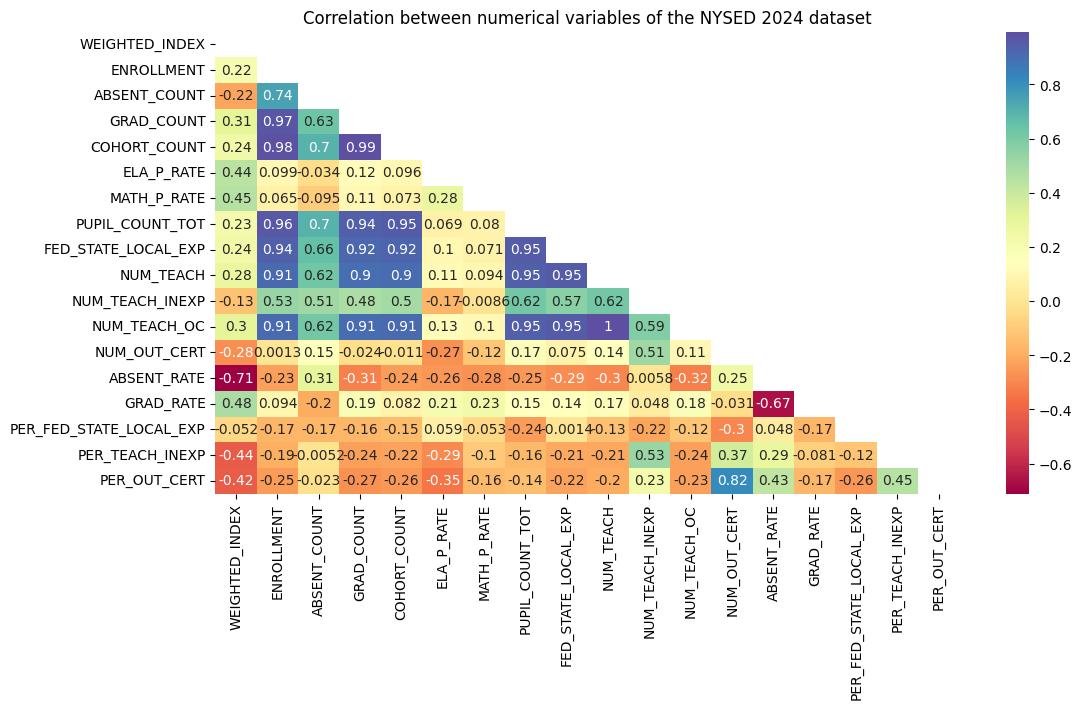

In [11]:
# Check the correlation between selected numerical columns
nysed_2024_corr = nysed_2024[numerical_cols].corr()
plt.figure(figsize = (12, 6))
sns.heatmap(data = nysed_2024_corr, mask = np.triu(nysed_2024_corr), cmap = 'Spectral', annot = True)
# Used np.triu to show only the lower triangle of the correlation graph
plt.title('Correlation between numerical variables of the NYSED 2024 dataset')

From the correlation heatmap and my knowledge of the dataset, I can eliminate a few features:

- ```NUM_TEACH``` and ```NUM_TEACH_OC``` is actually the same number. I will eliminate ```NUM_TEACH_OC```.

- ```ENROLLMENT```, ```COHORT_COUNT``` and ```PUPIL_COUNT_TOT``` all refers to the number of students. They are all very strongly correlated, so I will keep ```ENROLLMENT``` and remove the other two variables.

EDA

In [12]:
nysed_2024.drop(['NUM_TEACH_OC', 'COHORT_COUNT', 'PUPIL_COUNT_TOT'], axis = 1)
print(nysed_2024.shape)
nysed_2024.head()

(990, 21)


,INSTITUTION_ID,ENTITY_CD,ENTITY_NAME,WEIGHTED_INDEX,ENROLLMENT,ABSENT_COUNT,GRAD_COUNT,COHORT_COUNT,ELA_P_RATE,MATH_P_RATE,...,FED_STATE_LOCAL_EXP,NUM_TEACH,NUM_TEACH_INEXP,NUM_TEACH_OC,NUM_OUT_CERT,ABSENT_RATE,GRAD_RATE,PER_FED_STATE_LOCAL_EXP,PER_TEACH_INEXP,PER_OUT_CERT
0,800000055743,10100010034,ALBANY HIGH SCHOOL,82.2,3046,1550,549,704,98.9,84.3,...,94032063,235,63,214,14,0.508864,0.779830,34020.283285,0.268085,0.065421
1,800000055479,10201040001,BERNE-KNOX-WESTERLO JUNIOR-SENIOR HS,142.3,222,42,47,53,100.0,86.7,...,11481752,41,11,41,1,0.189189,0.886792,35220.098160,0.268293,0.024390
2,800000055439,10306060008,BETHLEHEM CENTRAL SENIOR HIGH SCHOOL,198.1,1374,155,333,349,99.4,92.1,...,32156676,110,9,107,1,0.112809,0.954155,23420.739985,0.081818,0.009346
3,800000055436,10402060001,RAVENA-COEYMANS-SELKIRK SR HS,129.2,530,164,118,133,100.0,87.9,...,13997053,59,24,55,3,0.309434,0.887218,27021.337838,0.406780,0.054545
4,800000055426,10500010007,COHOES HIGH SCHOOL,94.0,619,326,109,132,100.0,81.0,...,14868772,52,8,51,0,0.526656,0.825758,25073.814503,0.153846,0.000000


In [13]:
# Numerical columns when I eliminated columns with redundant meanings
numerical_cols = nysed_2024.describe().columns.drop(['INSTITUTION_ID', 'ENTITY_CD'])
print(numerical_cols)
print(len(numerical_cols))

Index(['WEIGHTED_INDEX', 'ENROLLMENT', 'ABSENT_COUNT', 'GRAD_COUNT',
       'COHORT_COUNT', 'ELA_P_RATE', 'MATH_P_RATE', 'PUPIL_COUNT_TOT',
       'FED_STATE_LOCAL_EXP', 'NUM_TEACH', 'NUM_TEACH_INEXP', 'NUM_TEACH_OC',
       'NUM_OUT_CERT', 'ABSENT_RATE', 'GRAD_RATE', 'PER_FED_STATE_LOCAL_EXP',
       'PER_TEACH_INEXP', 'PER_OUT_CERT'],
      dtype='object')
18


Text(0.5, 1.02, 'Distribution of each numerical column in the NYSED 2024 dataset (histograms)')

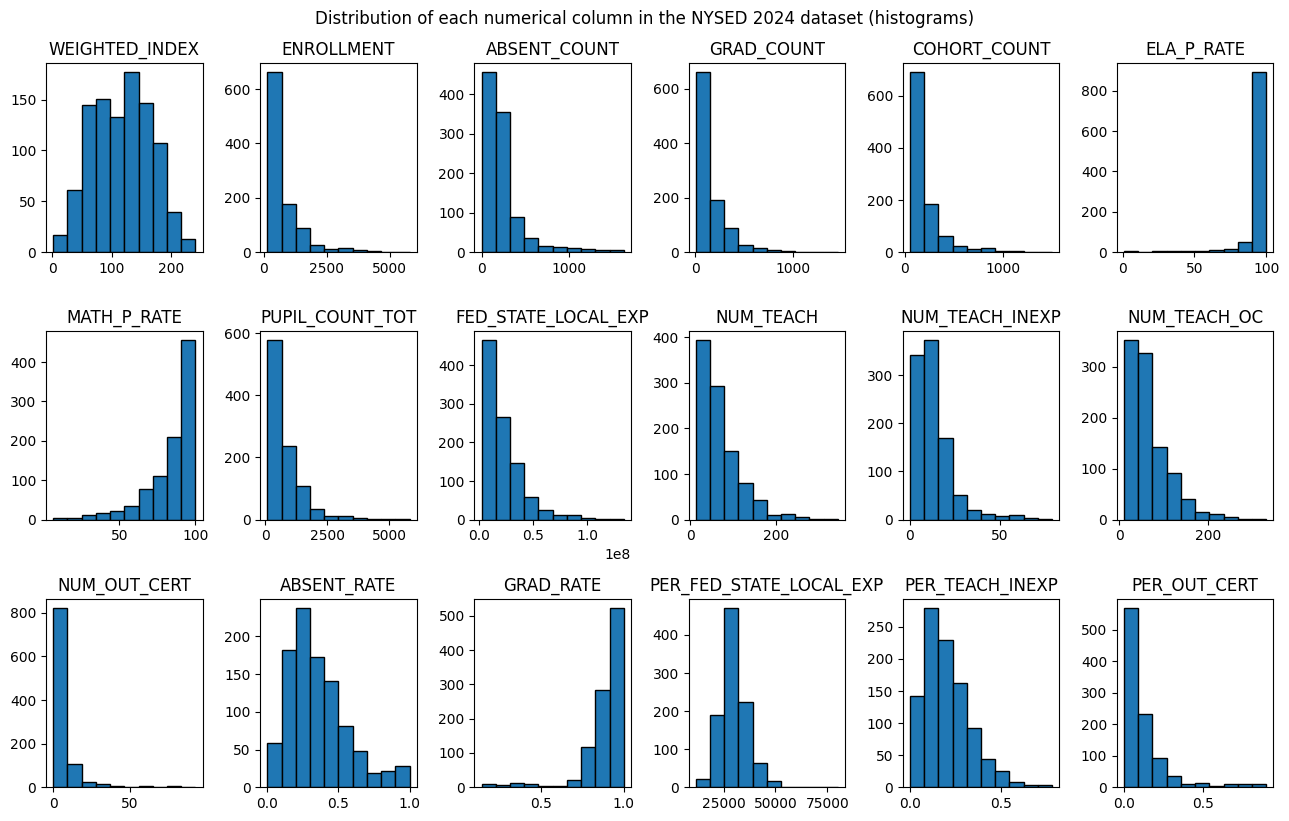

In [14]:
fig, ax = plt.subplots(nrows = 3, ncols = 6, figsize = (13, 8))

# The counter method: https://www.kaggle.com/code/aleksandradeis/bank-marketing-analysis/notebook
counter = 0
for var in numerical_cols:
    ax[counter // 6][counter % 6].hist(nysed_2024[var], edgecolor = 'black')
    ax[counter // 6][counter % 6].set_title(var)
    counter += 1

fig.tight_layout() # make sure that the graph titles and axes don't overlap with each other
fig.suptitle('Distribution of each numerical column in the NYSED 2024 dataset (histograms)', y = 1.02)

The ```WEIGHTED_INDEX``` follows a normal distribution, while ```ABSENT_RATE``` and ```PER_TEACH_INEXP``` follows a slight right-skewed distribution.

Most of the other variables are heavily skewed. ```ELA_P_RATE```, ```MATH_P_RATE``` and ```GRAD_RATE``` are skewed right, the others are skewed left.

In [15]:
nysed_2024[nysed_2024['MATH_P_RATE'].notna()]

,INSTITUTION_ID,ENTITY_CD,ENTITY_NAME,WEIGHTED_INDEX,ENROLLMENT,ABSENT_COUNT,GRAD_COUNT,COHORT_COUNT,ELA_P_RATE,MATH_P_RATE,...,FED_STATE_LOCAL_EXP,NUM_TEACH,NUM_TEACH_INEXP,NUM_TEACH_OC,NUM_OUT_CERT,ABSENT_RATE,GRAD_RATE,PER_FED_STATE_LOCAL_EXP,PER_TEACH_INEXP,PER_OUT_CERT
0,800000055743,10100010034,ALBANY HIGH SCHOOL,82.2,3046,1550,549,704,98.9,84.3,...,94032063,235,63,214,14,0.508864,0.779830,34020.283285,0.268085,0.065421
1,800000055479,10201040001,BERNE-KNOX-WESTERLO JUNIOR-SENIOR HS,142.3,222,42,47,53,100.0,86.7,...,11481752,41,11,41,1,0.189189,0.886792,35220.098160,0.268293,0.024390
2,800000055439,10306060008,BETHLEHEM CENTRAL SENIOR HIGH SCHOOL,198.1,1374,155,333,349,99.4,92.1,...,32156676,110,9,107,1,0.112809,0.954155,23420.739985,0.081818,0.009346
3,800000055436,10402060001,RAVENA-COEYMANS-SELKIRK SR HS,129.2,530,164,118,133,100.0,87.9,...,13997053,59,24,55,3,0.309434,0.887218,27021.337838,0.406780,0.054545
4,800000055426,10500010007,COHOES HIGH SCHOOL,94.0,619,326,109,132,100.0,81.0,...,14868772,52,8,51,0,0.526656,0.825758,25073.814503,0.153846,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,800000050792,670201060001,ATTICA SENIOR HIGH SCHOOL,163.5,356,97,102,106,100.0,74.5,...,10279284,41,2,39,1,0.272472,0.962264,29202.511364,0.048780,0.025641
986,800000050828,670401040001,LETCHWORTH SENIOR HIGH SCHOOL,155.7,263,32,60,63,98.5,95.5,...,7530930,42,6,41,0,0.121673,0.952381,28526.250000,0.142857,0.000000
987,800000050807,671201060002,PERRY JUNIOR-SENIOR HIGH SCHOOL,174.8,227,48,54,59,100.0,96.3,...,6565281,50,10,47,3,0.211454,0.915254,19253.023460,0.200000,0.063830
988,800000050811,671501040002,WARSAW SENIOR HIGH SCHOOL,177.1,232,52,47,56,100.0,96.4,...,6387078,39,4,38,2,0.224138,0.839286,28387.013333,0.102564,0.052632


Text(0.5, 1.02, 'Distribution of each numerical column in the NYSED 2024 dataset (box plots)')

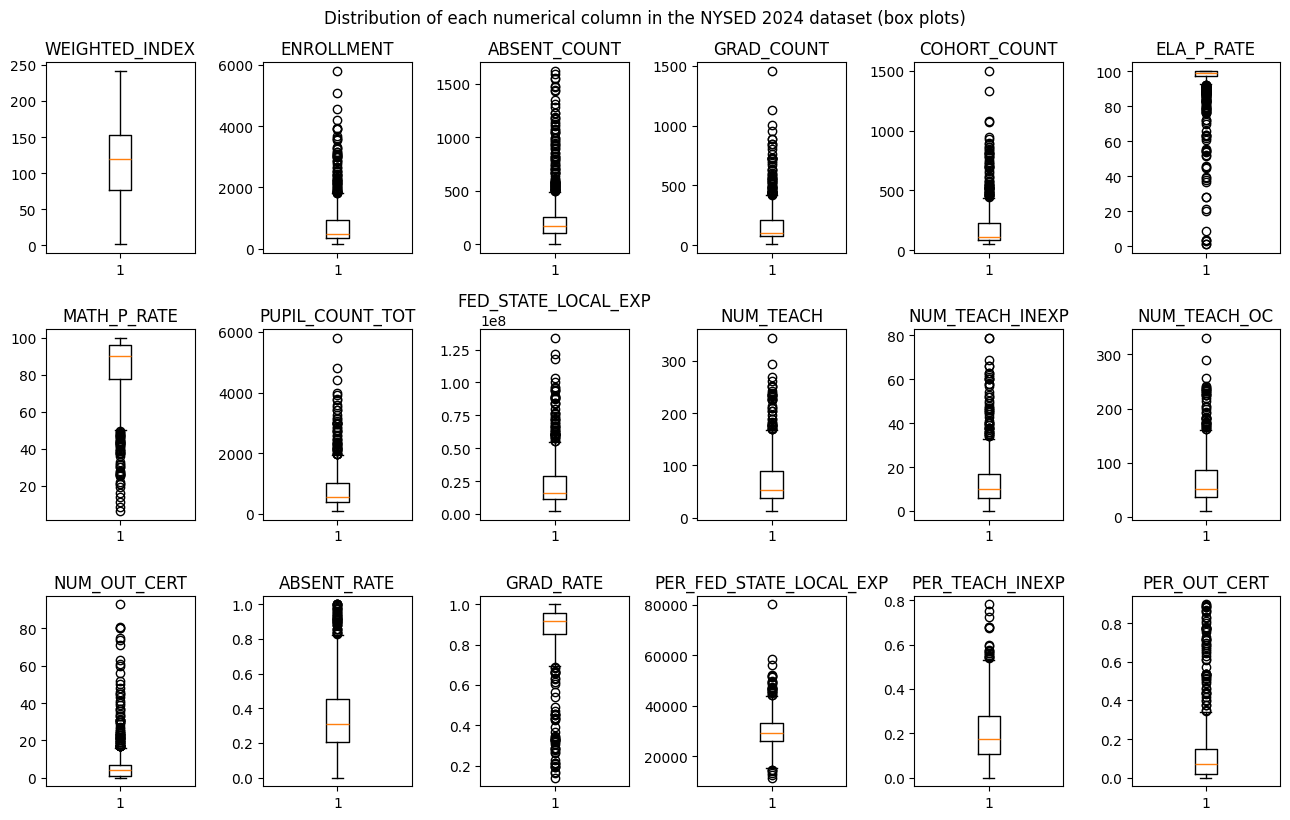

In [16]:
fig, ax = plt.subplots(nrows = 3, ncols = 6, figsize = (13, 8))

# The counter method: https://www.kaggle.com/code/aleksandradeis/bank-marketing-analysis/notebook
counter = 0
for var in numerical_cols:
    ax[counter // 6][counter % 6].boxplot(nysed_2024[nysed_2024[var].notna()][var]) # avoid missing values
    ax[counter // 6][counter % 6].set_title(var)
    counter += 1

fig.tight_layout() # make sure that the graph titles and axes don't overlap with each other
fig.suptitle('Distribution of each numerical column in the NYSED 2024 dataset (box plots)', y = 1.02)

#### Relationship between federal/state/local expenditure with the rates:

In [17]:
nysed_2024_exp_cat = nysed_2024.copy()
nysed_2024_exp_cat['EXP_QUARTILE'] = pd.qcut(nysed_2024['PER_FED_STATE_LOCAL_EXP'], q = 4) # split into quartiles (4 parts with equal sizes)
nysed_2024_exp_cat.head()

,INSTITUTION_ID,ENTITY_CD,ENTITY_NAME,WEIGHTED_INDEX,ENROLLMENT,ABSENT_COUNT,GRAD_COUNT,COHORT_COUNT,ELA_P_RATE,MATH_P_RATE,...,NUM_TEACH,NUM_TEACH_INEXP,NUM_TEACH_OC,NUM_OUT_CERT,ABSENT_RATE,GRAD_RATE,PER_FED_STATE_LOCAL_EXP,PER_TEACH_INEXP,PER_OUT_CERT,EXP_QUARTILE
0,800000055743,10100010034,ALBANY HIGH SCHOOL,82.2,3046,1550,549,704,98.9,84.3,...,235,63,214,14,0.508864,0.779830,34020.283285,0.268085,0.065421,"(33163.077, 80138.655]"
1,800000055479,10201040001,BERNE-KNOX-WESTERLO JUNIOR-SENIOR HS,142.3,222,42,47,53,100.0,86.7,...,41,11,41,1,0.189189,0.886792,35220.098160,0.268293,0.024390,"(33163.077, 80138.655]"
2,800000055439,10306060008,BETHLEHEM CENTRAL SENIOR HIGH SCHOOL,198.1,1374,155,333,349,99.4,92.1,...,110,9,107,1,0.112809,0.954155,23420.739985,0.081818,0.009346,"(11519.780999999999, 25820.997]"
3,800000055436,10402060001,RAVENA-COEYMANS-SELKIRK SR HS,129.2,530,164,118,133,100.0,87.9,...,59,24,55,3,0.309434,0.887218,27021.337838,0.406780,0.054545,"(25820.997, 29200.82]"
4,800000055426,10500010007,COHOES HIGH SCHOOL,94.0,619,326,109,132,100.0,81.0,...,52,8,51,0,0.526656,0.825758,25073.814503,0.153846,0.000000,"(11519.780999999999, 25820.997]"


Text(0.5, -0.02, 'Quartile of federal/local expenditure per student (Q4 = highest)')

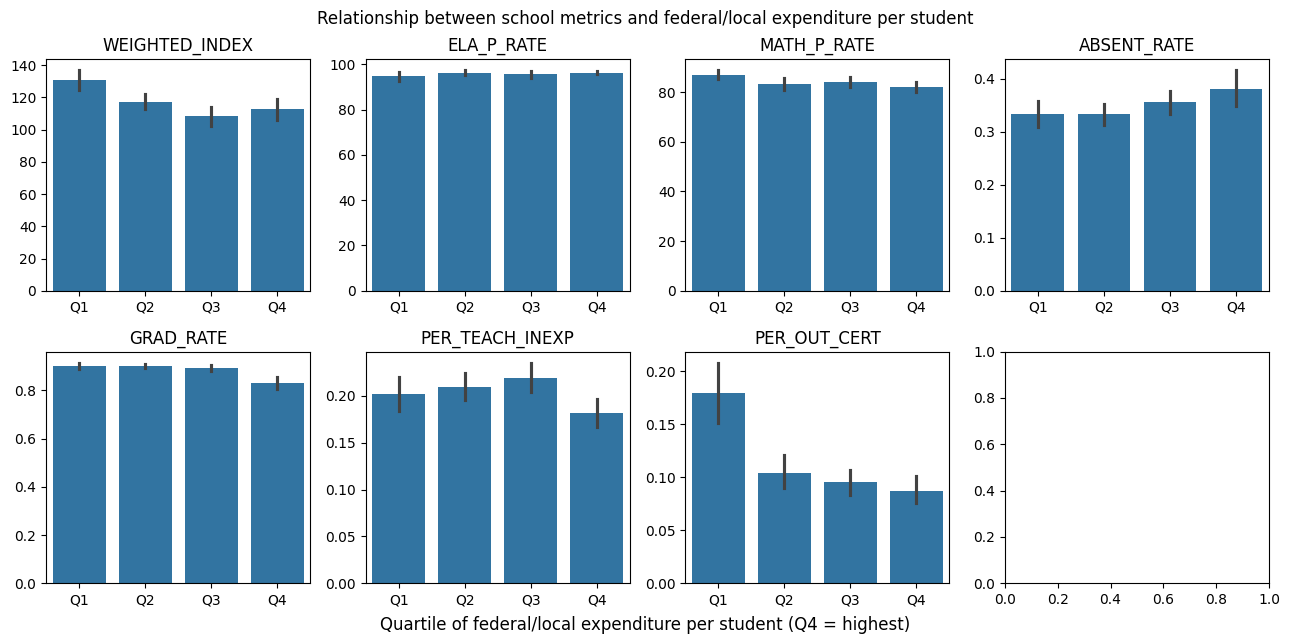

In [18]:
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = (13, 6))

counter = 0
for var in ['WEIGHTED_INDEX', 'ELA_P_RATE', 'MATH_P_RATE', 'ABSENT_RATE', 'GRAD_RATE', 'PER_TEACH_INEXP', 'PER_OUT_CERT']:
    ax_obj = ax[counter // 4][counter % 4]
    sns.barplot(data = nysed_2024_exp_cat, x = 'EXP_QUARTILE', y = var, ax = ax_obj)
    ax_obj.set_title(var)
    ax_obj.set_xticks(ticks = [0, 1, 2, 3], labels = ['Q1', 'Q2', 'Q3', 'Q4'])

    ax_obj.set_xlabel("")
    ax_obj.set_ylabel("")

    counter += 1

fig.tight_layout() # make sure that the graph titles and axes don't overlap with each other
fig.suptitle('Relationship between school metrics and federal/local expenditure per student', y = 1.02)
fig.supxlabel('Quartile of federal/local expenditure per student (Q4 = highest)', y = -0.02)

Federal and local expenditure per student has the most significant effect on percentage of teachers out of certification. The bottom 25% of schools with the lowest expenditure per student had a high proportion of out-of-certification teachers, while the figure sharply dropped when expenditure per student increased to the second quartile. Perhaps with additional government expenditure, the schools could easily attract well-qualified teachers 

Increasing levels of expenditure per student was actually associated with lower weighted index (overall indicator of test performance), higher chronic absenteeism rate, and lower graduation rate. One possible explanation is that federal and/or local governments may prioritize schools needing better support.

On the contrary, the participation rate in ELA assessments was not affected significantly by outside government expenditure, although the top 25% of schools with highest expenditure had a slightly higher participation rate than that of the bottom 25%.

Text(0.5, -0.02, 'Quartile of federal/local expenditure per student (Q4 = highest)')

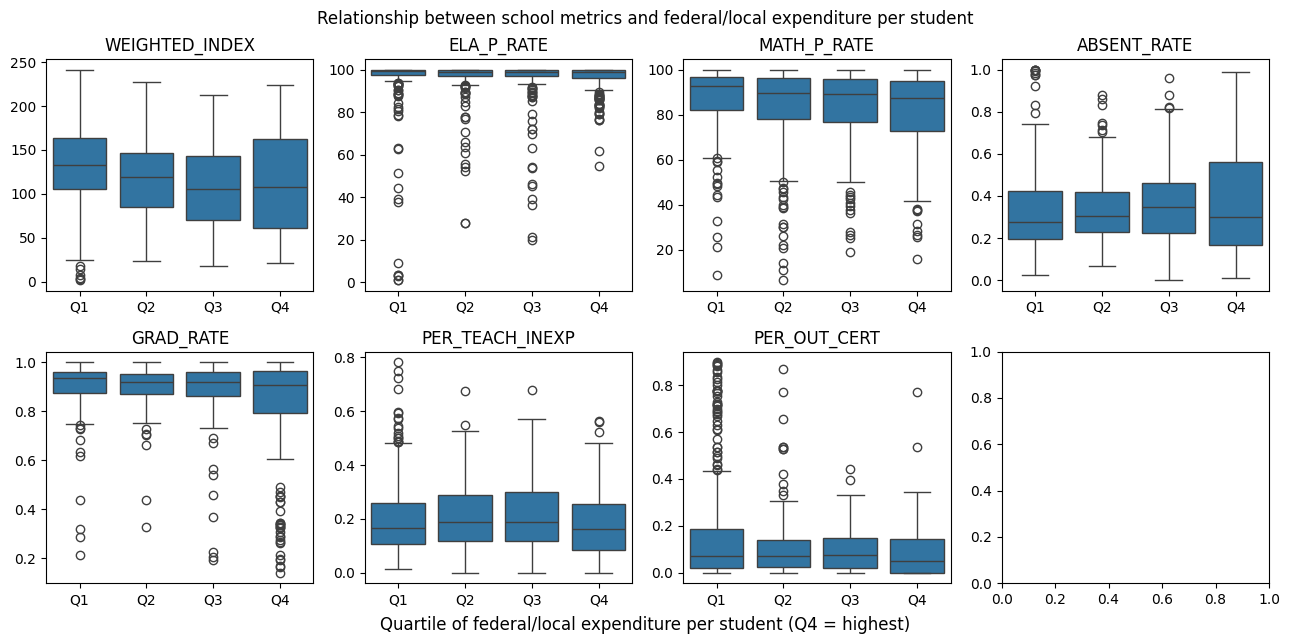

In [19]:
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = (13, 6))

counter = 0
for var in ['WEIGHTED_INDEX', 'ELA_P_RATE', 'MATH_P_RATE', 'ABSENT_RATE', 'GRAD_RATE', 'PER_TEACH_INEXP', 'PER_OUT_CERT']:
    ax_obj = ax[counter // 4][counter % 4]
    sns.boxplot(data = nysed_2024_exp_cat, x = 'EXP_QUARTILE', y = var, ax = ax_obj)
    ax_obj.set_title(var)
    ax_obj.set_xticks(ticks = [0, 1, 2, 3], labels = ['Q1', 'Q2', 'Q3', 'Q4'])

    ax_obj.set_xlabel("")
    ax_obj.set_ylabel("")

    counter += 1

fig.tight_layout() # make sure that the graph titles and axes don't overlap with each other
fig.suptitle('Relationship between school metrics and federal/local expenditure per student', y = 1.02)
fig.supxlabel('Quartile of federal/local expenditure per student (Q4 = highest)', y = -0.02)

#### Relationship between ELA_P_RATE and MATH_P_RATE:

Text(0, 0.5, 'Math participation rate')

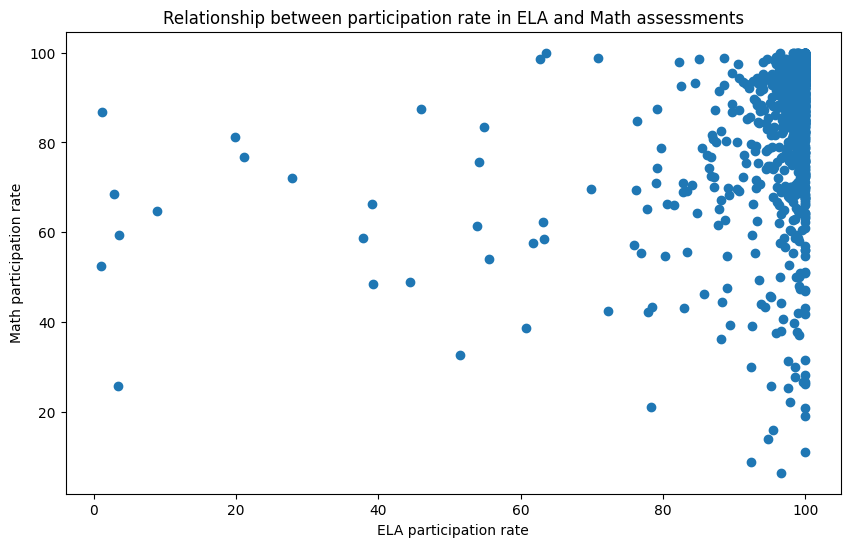

In [20]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.scatter(nysed_2024['ELA_P_RATE'], nysed_2024['MATH_P_RATE'])
ax.set_title('Relationship between participation rate in ELA and Math assessments')
ax.set_xlabel('ELA participation rate')
ax.set_ylabel('Math participation rate')

Only visualizing schools with both participation rates being 80 and above:

Text(0, 0.5, 'Math participation rate')

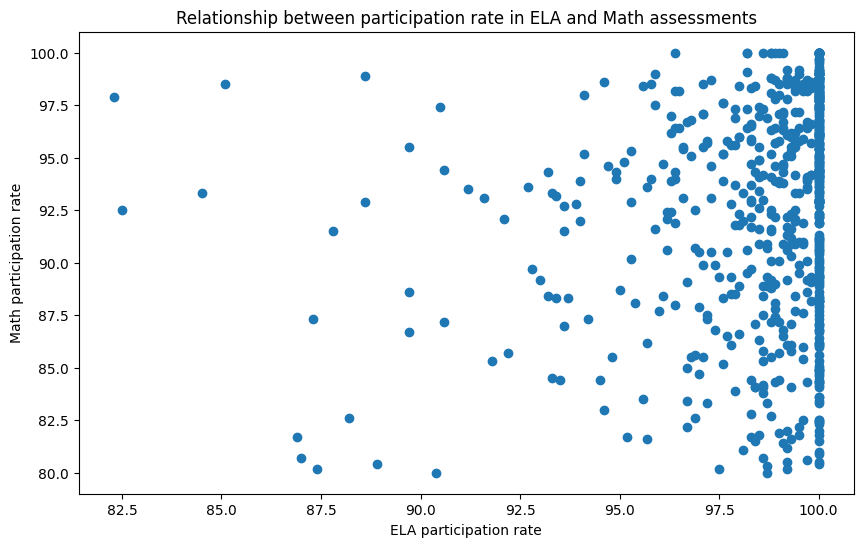

In [21]:
fig, ax = plt.subplots(figsize = (10, 6))
high_p_schools = nysed_2024[np.logical_and(nysed_2024['ELA_P_RATE'] >= 80, nysed_2024['MATH_P_RATE'] >= 80)]
ax.scatter(high_p_schools['ELA_P_RATE'], high_p_schools['MATH_P_RATE'])
ax.set_title('Relationship between participation rate in ELA and Math assessments')
ax.set_xlabel('ELA participation rate')
ax.set_ylabel('Math participation rate')

The differences in participation rate in ELA and Math assessments are very significant. Many schools had 100% participation rate in ELA but lower than 50% participation rate in Math, suggesting that those schools may not offer a good Math education, many students opting out of tests, or ELA in these schools are perceived to be much more important than Math.

How many schools have 100% participation rate in both subjects?

In [22]:
perfect_p_schools = nysed_2024[np.logical_and(nysed_2024['ELA_P_RATE'] == 100, nysed_2024['MATH_P_RATE'] == 100)]
print(perfect_p_schools.shape)
perfect_p_schools.head()

(36, 21)


,INSTITUTION_ID,ENTITY_CD,ENTITY_NAME,WEIGHTED_INDEX,ENROLLMENT,ABSENT_COUNT,GRAD_COUNT,COHORT_COUNT,ELA_P_RATE,MATH_P_RATE,...,FED_STATE_LOCAL_EXP,NUM_TEACH,NUM_TEACH_INEXP,NUM_TEACH_OC,NUM_OUT_CERT,ABSENT_RATE,GRAD_RATE,PER_FED_STATE_LOCAL_EXP,PER_TEACH_INEXP,PER_OUT_CERT
10,800000054475,51301040003,MORAVIA JUNIOR-SENIOR HS,143.2,268,74,61,68,100.0,100.0,...,14126342,44,9,41,4,0.276119,0.897059,30911.032823,0.204545,0.097561
37,800000054440,60401040006,CASSADAGA VALLEY MIDDLE/HIGH SCHOOL,119.6,213,36,62,69,100.0,100.0,...,12088055,46,7,45,2,0.169014,0.898551,31479.309896,0.152174,0.044444
59,800000053757,100501040003,TACONIC HILLS JUNIOR/SENIOR HIGH,143.7,343,112,88,103,100.0,100.0,...,19100464,56,20,53,9,0.326531,0.854369,38743.334686,0.357143,0.169811
92,800000052908,140600010102,CITY HONORS SCHOOL,199.2,592,130,139,145,100.0,100.0,...,28203467,82,2,81,4,0.219595,0.958621,26707.828598,0.024390,0.049383
127,800000052047,142101040002,AKRON HIGH SCHOOL,170.7,391,95,112,116,100.0,100.0,...,7753158,44,4,44,0,0.242967,0.965517,20243.232376,0.090909,0.000000


#### Exploring the student-to-teacher ratio:

In [23]:
nysed_2024['STUDENT_TO_TEACHER'] = nysed_2024['ENROLLMENT'] / nysed_2024['NUM_TEACH']
nysed_2024.head()

,INSTITUTION_ID,ENTITY_CD,ENTITY_NAME,WEIGHTED_INDEX,ENROLLMENT,ABSENT_COUNT,GRAD_COUNT,COHORT_COUNT,ELA_P_RATE,MATH_P_RATE,...,NUM_TEACH,NUM_TEACH_INEXP,NUM_TEACH_OC,NUM_OUT_CERT,ABSENT_RATE,GRAD_RATE,PER_FED_STATE_LOCAL_EXP,PER_TEACH_INEXP,PER_OUT_CERT,STUDENT_TO_TEACHER
0,800000055743,10100010034,ALBANY HIGH SCHOOL,82.2,3046,1550,549,704,98.9,84.3,...,235,63,214,14,0.508864,0.779830,34020.283285,0.268085,0.065421,12.961702
1,800000055479,10201040001,BERNE-KNOX-WESTERLO JUNIOR-SENIOR HS,142.3,222,42,47,53,100.0,86.7,...,41,11,41,1,0.189189,0.886792,35220.098160,0.268293,0.024390,5.414634
2,800000055439,10306060008,BETHLEHEM CENTRAL SENIOR HIGH SCHOOL,198.1,1374,155,333,349,99.4,92.1,...,110,9,107,1,0.112809,0.954155,23420.739985,0.081818,0.009346,12.490909
3,800000055436,10402060001,RAVENA-COEYMANS-SELKIRK SR HS,129.2,530,164,118,133,100.0,87.9,...,59,24,55,3,0.309434,0.887218,27021.337838,0.406780,0.054545,8.983051
4,800000055426,10500010007,COHOES HIGH SCHOOL,94.0,619,326,109,132,100.0,81.0,...,52,8,51,0,0.526656,0.825758,25073.814503,0.153846,0.000000,11.903846


Distribution of student-to-teacher ratio:

Text(0.5, 1.0, 'Box plot')

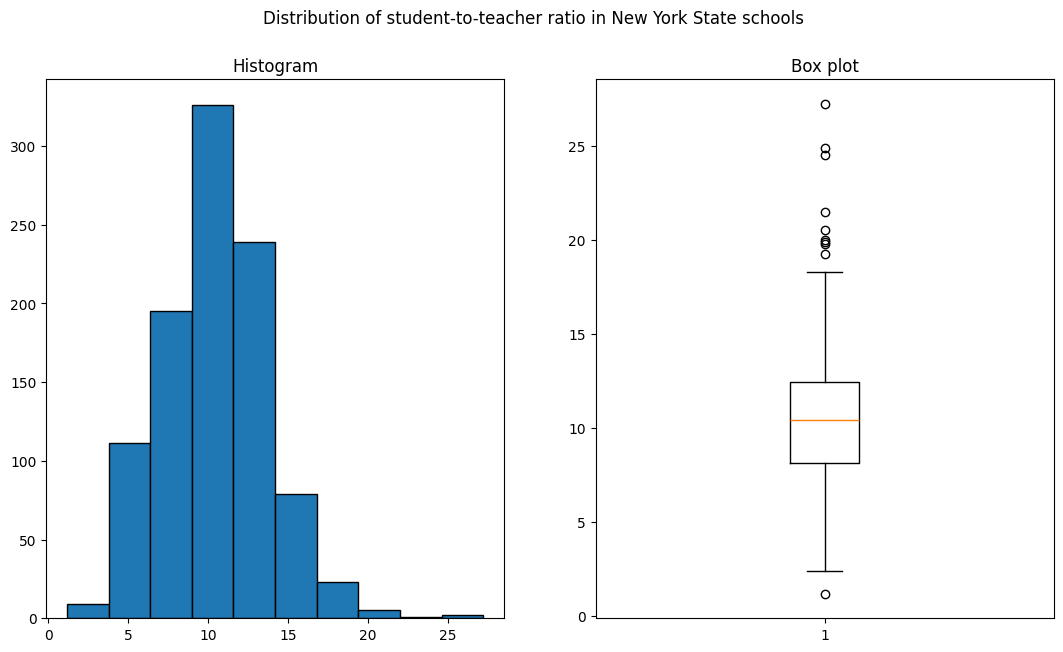

In [24]:
fig, ax = plt.subplots(figsize = (13, 7), nrows = 1, ncols = 2)
fig.suptitle('Distribution of student-to-teacher ratio in New York State schools')

ax[0].hist(nysed_2024['STUDENT_TO_TEACHER'], edgecolor = 'black')
ax[0].set_title('Histogram')

ax[1].boxplot(nysed_2024['STUDENT_TO_TEACHER'])
ax[1].set_title('Box plot')

The majority of schools had 10 students for each teacher, which is a reasonable number that aligns with the average of developed countries in the world. The student-to-teacher ratios in high schools across New York State followed a slightly right-skewed distribution, with outlier schools having more than 20 students for each teacher.

#### Relationship between enrollment and weighted average performance index:

Text(0, 0.5, 'Weighted average performance index')

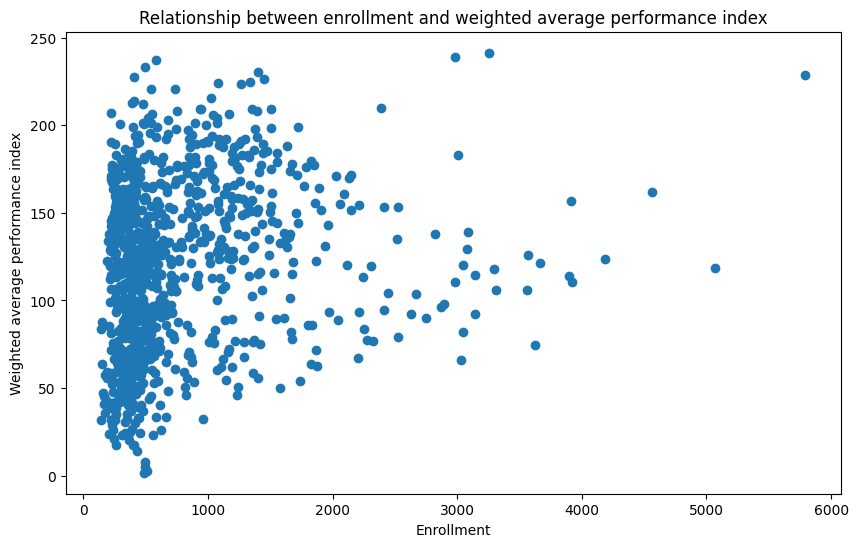

In [25]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.scatter(nysed_2024['ENROLLMENT'], nysed_2024['WEIGHTED_INDEX'])
ax.set_title('Relationship between enrollment and weighted average performance index')
ax.set_xlabel('Enrollment')
ax.set_ylabel('Weighted average performance index')

Text(0, 0.5, 'Weighted average performance index')

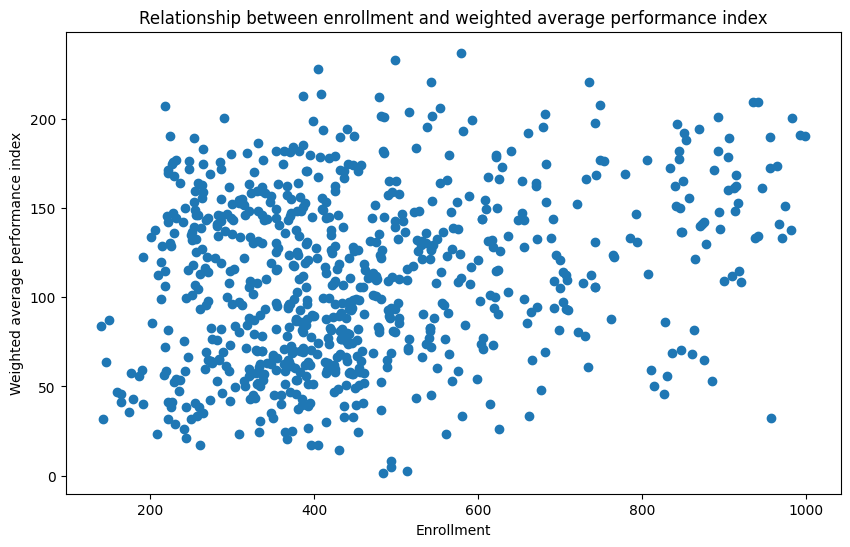

In [26]:
# Zoom into schools with enrollment <= 1000
few_enrolled = nysed_2024[nysed_2024['ENROLLMENT'] <= 1000]

fig, ax = plt.subplots(figsize = (10, 6))
ax.scatter(few_enrolled['ENROLLMENT'], few_enrolled['WEIGHTED_INDEX'])
ax.set_title('Relationship between enrollment and weighted average performance index')
ax.set_xlabel('Enrollment')
ax.set_ylabel('Weighted average performance index')

What about student-to-teacher ratio?

Text(0, 0.5, 'Weighted average performance index')

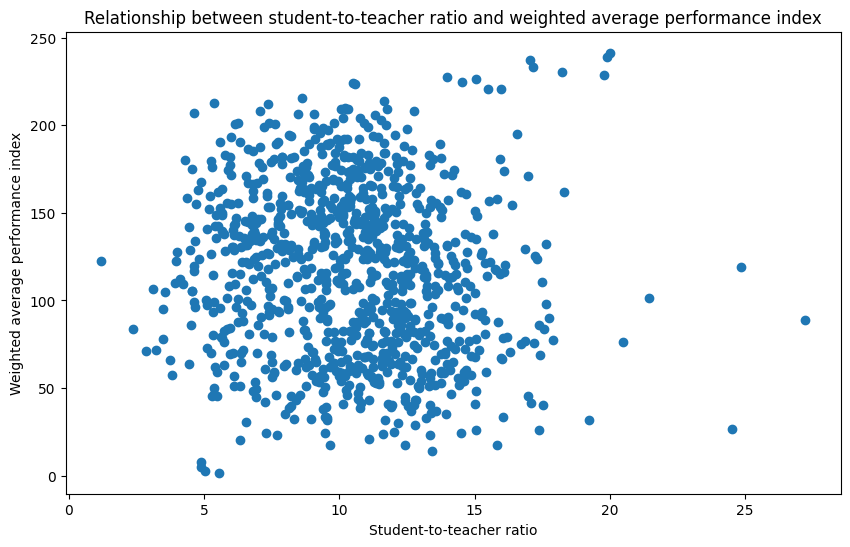

In [27]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.scatter(nysed_2024['ENROLLMENT'] / nysed_2024['NUM_TEACH'], nysed_2024['WEIGHTED_INDEX'])
ax.set_title('Relationship between student-to-teacher ratio and weighted average performance index')
ax.set_xlabel('Student-to-teacher ratio')
ax.set_ylabel('Weighted average performance index')

There is no significant relationship between enrollment and weighted index, or student-to-teacher ratio and weighted index.

We can still see the typical ranges of these numbers, such as most schools have student-to-teacher ratio ranging from 5 to 17, and enrollment below 1000.

### III. Data preprocessing

In [31]:
nysed_2024_features_df = nysed_2024[['ABSENT_RATE', 'GRAD_RATE', 'PER_FED_STATE_LOCAL_EXP', 'ELA_P_RATE', 'MATH_P_RATE',
                                     'PER_TEACH_INEXP', 'PER_OUT_CERT', 'STUDENT_TO_TEACHER']]
nysed_2024_features_df.head()

,ABSENT_RATE,GRAD_RATE,PER_FED_STATE_LOCAL_EXP,ELA_P_RATE,MATH_P_RATE,PER_TEACH_INEXP,PER_OUT_CERT,STUDENT_TO_TEACHER
0,0.508864,0.779830,34020.283285,98.9,84.3,0.268085,0.065421,12.961702
1,0.189189,0.886792,35220.098160,100.0,86.7,0.268293,0.024390,5.414634
2,0.112809,0.954155,23420.739985,99.4,92.1,0.081818,0.009346,12.490909
3,0.309434,0.887218,27021.337838,100.0,87.9,0.406780,0.054545,8.983051
4,0.526656,0.825758,25073.814503,100.0,81.0,0.153846,0.000000,11.903846


Text(0.5, 1.0, 'Correlation between some features for clustering in the NYSED 2024 dataset')

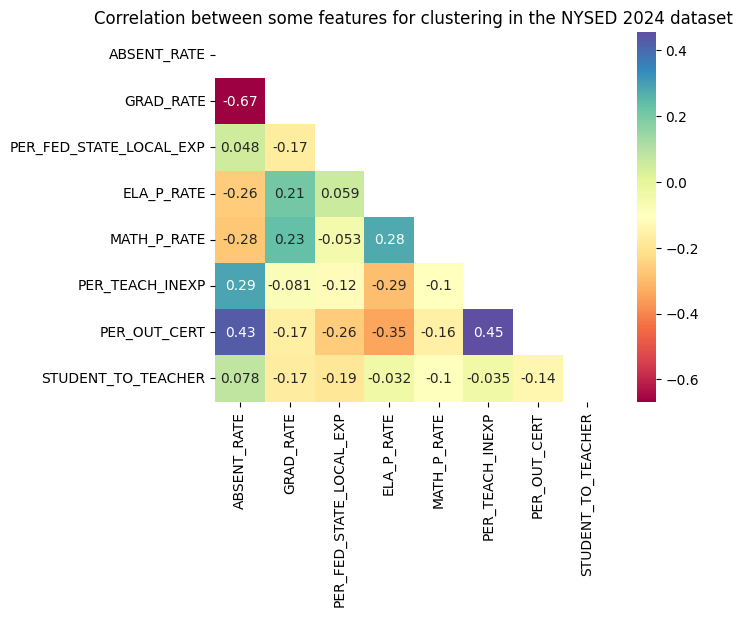

In [35]:
# Check the pairwise correlations again
# Check the correlation between selected numerical columns
features_corr = nysed_2024_features_df.corr()
plt.figure()
sns.heatmap(data = features_corr, mask = np.triu(features_corr), cmap = 'Spectral', annot = True)
# Used np.triu to show only the lower triangle of the correlation graph
plt.title('Correlation between some features for clustering in the NYSED 2024 dataset')

In [39]:
# Convert to a NumPy array
X = nysed_2024_features_df.values
print(X.shape)
print(type(X))

(990, 8)
<class 'numpy.ndarray'>


### IV. Implementing clustering algorithms

The clustering algorithms that I want to implement is: Agglomerative Clustering (a type of Hierarchical Clustering), K-means, and DBSCAN.

I will split the schools into 4 clusters based on the accountability status. In the original NYSED designation, the accountability statuses are divided into: (1) Local Support and Improvement, (2) Targeted Support and Improvement, (3) Additional Targeted Support and Improvement, and (4) Comprehensive Support and Improvement.

To evaluate these clustering algorithms, I will use the metrics:

- Existing accountability status designation in the NYSED dataset

- External metrics: silhouette score, Dunn's index, Calinski-Harabasz index, Davies-Bouldin index, etc.

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer # We have missing data, so we have to impute first
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN # not using DBSCAN yet because number of clusters are not specified 
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, rand_score, adjusted_rand_score

In [83]:
# Preprocessing pipeline because we have missing data
preprocessing = Pipeline([('scaler', StandardScaler()), ('imputer', KNNImputer())])
X_new = preprocessing.fit_transform(X)

In [84]:
# Write a function to reuse different algorithms and output results
def cluster_results(model_name, model):

    # Initialize the list of metrics to be included in the output table
    silhouette_scores = []
    calinski_harabasz_scores = []
    davies_bouldin_scores = []

    # Add each individual model's performance to the list of metrics
    cluster_labels = model.fit_predict(X_new)
    silhouette_scores.append(silhouette_score(X_new, cluster_labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(X_new, cluster_labels))
    davies_bouldin_scores.append(davies_bouldin_score(X_new, cluster_labels))

    # Aggregate the results into a DataFrame    
    df = pd.DataFrame({'model_name': model_name, 'silhouette_score': silhouette_scores,
                       'calinski_harabasz_score': calinski_harabasz_scores, 'davies_bouldin_score': davies_bouldin_scores})
    return df    

In [87]:
# Test on models with default number of clusters and default (hyper)parameters
model_list = [('Agglomerative Clustering', AgglomerativeClustering()), ('K-Means', KMeans()), ('DBSCAN', DBSCAN())]

entire_results = pd.concat([cluster_results(model_name, model) for model_name, model in model_list], ignore_index = True)
entire_results

,model_name,silhouette_score,calinski_harabasz_score,davies_bouldin_score
0,Agglomerative Clustering,0.245040,199.127260,2.033523
1,K-Means,0.199529,192.527695,1.262811
2,DBSCAN,-0.292223,4.101684,1.660507


**(WORK IN PROGRESS)**

In [71]:
# Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters = 4)
cluster_labels_agg = agg_clust.fit_predict(X_new) # return an array of cluster labels

# Create a DataFrame of cluster labels and concatenate it with the existing features DataFrame
cluster_df_agg = pd.DataFrame({'CLUSTER_LABEL': cluster_labels_agg})
nysed_2024_agg = pd.concat([nysed_2024_features_df, cluster_df_agg], axis = 1)
nysed_2024_agg

,ABSENT_RATE,GRAD_RATE,PER_FED_STATE_LOCAL_EXP,ELA_P_RATE,MATH_P_RATE,PER_TEACH_INEXP,PER_OUT_CERT,STUDENT_TO_TEACHER,CLUSTER_LABEL
0,0.508864,0.779830,34020.283285,98.9,84.3,0.268085,0.065421,12.961702,1
1,0.189189,0.886792,35220.098160,100.0,86.7,0.268293,0.024390,5.414634,1
2,0.112809,0.954155,23420.739985,99.4,92.1,0.081818,0.009346,12.490909,1
3,0.309434,0.887218,27021.337838,100.0,87.9,0.406780,0.054545,8.983051,0
4,0.526656,0.825758,25073.814503,100.0,81.0,0.153846,0.000000,11.903846,1
...,...,...,...,...,...,...,...,...,...
985,0.272472,0.962264,29202.511364,100.0,74.5,0.048780,0.025641,8.682927,1
986,0.121673,0.952381,28526.250000,98.5,95.5,0.142857,0.000000,6.261905,1
987,0.211454,0.915254,19253.023460,100.0,96.3,0.200000,0.063830,4.540000,1
988,0.224138,0.839286,28387.013333,100.0,96.4,0.102564,0.052632,5.948718,1


In [73]:
# Calculate the necessary metrics
print(f'Silhouette score: {silhouette_score(X_new, cluster_labels_agg)}')
print(f'Calinski-Harabasz score: {calinski_harabasz_score(X_new, cluster_labels_agg)}')
print(f'Davies-Bouldin score: {davies_bouldin_score(X_new, cluster_labels_agg)}')

Silhouette score: 0.2361053337786529
Calinski-Harabasz score: 183.11181129200278
Davies-Bouldin score: 1.5916402500815243


#### References/ Inspirations:

- https://www.kaggle.com/code/nguyenhuudien/ph-n-c-m-d-li-u-k-means-dbscan-v-ap (in Vietnamese)